> <font size="4"> In this module we will explore different methods of captcha recoginition.<font>

original quality


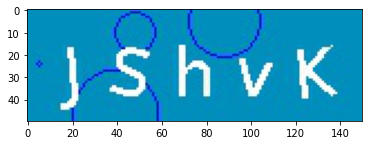

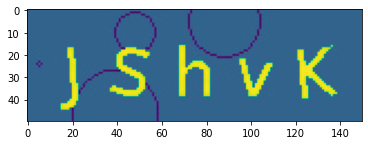

captcha recognise as: ana



In [4]:
import pytesseract
import cv2
from PIL import Image
import matplotlib.pyplot as plt
print("original quality")
image = cv2.imread("capa0.png")
im = Image.open("capa0.png") 
imgplot = plt.imshow(im)
plt.show()
img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# this step converts image to black and white
imgplot2 = plt.imshow(img)
plt.show()
tessdata_config = r'--psm 7'
text = pytesseract.image_to_string(img, config=tessdata_config)
print("captcha recognise as:",text)

 <font size="4"> The above is a high quality image next we will see for a screenshot quality image
 <font>

screenshot quality


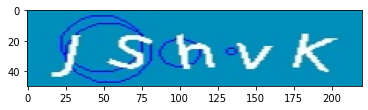

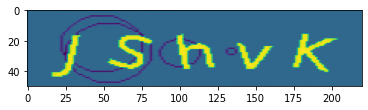

captcha recognise as: J Snvk



In [3]:
print("screenshot quality")
image = cv2.imread("capt0.png")
im = Image.open("capt0.png") 
imgplot = plt.imshow(im)
plt.show()
img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# this step converts image to black and white
imgplot2 = plt.imshow(img)
plt.show()
tessdata_config = r'--psm 7'
text = pytesseract.image_to_string(img, config=tessdata_config)
print("captcha recognise as:",text)

 <font size="4"> We can clearly see the change in accuracy.
 <font>

 > <font size="4"> Now we will use easyocr
 <font>

original quality


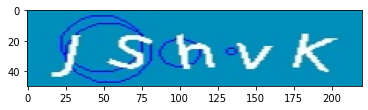

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


JShvk
screenshot quality


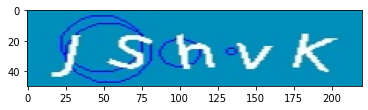

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


JscvK


In [4]:
import easyocr
print("original quality")
image = cv2.imread("capa0.png")
imgplot = plt.imshow(im)
plt.show()
reader = easyocr.Reader(['en']) # need to run only once to load model into memory
result = reader.readtext('capa0.png' ,detail = 0)
values = ','.join(str(v) for v in result)
text = values
C=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
for j in text:
        if str(j) not in (C):
            text = text.replace(j, "")
print(text)
print("screenshot quality")
image = cv2.imread("capt0.png")
imgplot = plt.imshow(im)
plt.show()
reader = easyocr.Reader(['en']) # need to run only once to load model into memory
result = reader.readtext('capt0.png' ,detail = 0)
values = ','.join(str(v) for v in result)
text = values
C=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
for j in text:
        if str(j) not in (C):
            text = text.replace(j, "")
print(text)

<font size="4"> Even though the accuracy has increased the difference in quality still matters.
 <font>

<font size="4"> Now we will highlight the text and remove the background noise to increase accuracy.

original quality


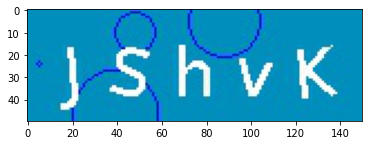

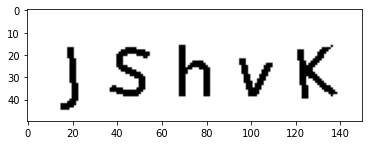

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


JShvK
screenshot quality


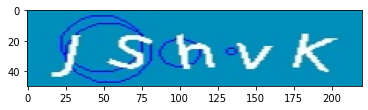

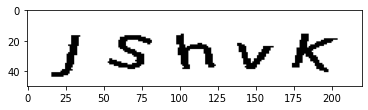

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


JShvK
--- 6.964061975479126 seconds ---


In [7]:
import time
import numpy as np
start_time = time.time()
print("original quality")
im = Image.open('capa0.png') 
imgplot = plt.imshow(im)
plt.show()# Can be many different formats.
im = im.convert('RGB')
pix = im.load()
his = im.histogram()
pix_size = im.size
im2 = Image.new(mode = "RGB", size = (pix_size),color = (255,255,255))
for x in range(pix_size[0]):
    for y in range(pix_size[1]):
        if np.mean(pix[x,y]) > 150:
            im2.putpixel((x, y),(0, 0, 0)) 
im2.save("newlogo.png")
im = Image.open('newlogo.png') 
imgplot = plt.imshow(im)
plt.show()
reader = easyocr.Reader(['en']) # need to run only once to load model into memory
result = reader.readtext('newlogo.png' ,detail = 0)
values = ','.join(str(v) for v in result)
text = values
C=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
for j in text:
        if str(j) not in (C):
            text = text.replace(j, "")
print(text)
print("screenshot quality")
im = Image.open('capt0.png') 
imgplot = plt.imshow(im)
plt.show()# Can be many different formats.
im = im.convert('RGB')
pix = im.load()
his = im.histogram()
pix_size = im.size
im2 = Image.new(mode = "RGB", size = (pix_size),color = (255,255,255))
for x in range(pix_size[0]):
    for y in range(pix_size[1]):
        if np.mean(pix[x,y]) > 150:
            im2.putpixel((x, y),(0, 0, 0)) 
im2.save("newlogo.png")
im = Image.open('newlogo.png') 
imgplot = plt.imshow(im)
plt.show()
reader = easyocr.Reader(['en']) # need to run only once to load model into memory
result = reader.readtext('newlogo.png' ,detail = 0)
values = ','.join(str(v) for v in result)
text = values
C=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
for j in text:
        if str(j) not in (C):
            text = text.replace(j, "")
print(text)
print("--- %s seconds ---" % (time.time() - start_time))

<font size="4"> Now we can detect both quality captcha text better for this image.<font>

In [32]:
from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By 
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.select import Select
from selenium.webdriver import ActionChains
from selenium.common.exceptions import NoSuchElementException
import time 
from selenium.webdriver.common.alert import Alert
import sys
from selenium.webdriver.chrome.options import Options
import urllib.request
import pyautogui
from PIL import Image
def get_captcha(driver, element, path):
    # now that we have the preliminary stuff out of the way time to get that image :D
    location = element.location
    size = element.size
    # saves screenshot of entire page
    driver.save_screenshot(path)

    # uses PIL library to open image in memory
    image = Image.open(path)

    left = location['x']+3
    top = location['y'] +4
    right = location['x'] + size['width']-3
    bottom = location['y'] + size['height'] -2

    image = image.crop((left, top, right, bottom))  # defines crop points
    image.save(path, 'png', optimize=True, quality=100)  # saves new cropped image
l=10000
capa = DesiredCapabilities.CHROME
chrome_options = Options()
chrome_options.add_argument('headless');
capa["pageLoadStrategy"] = "normal"
driver = webdriver.Chrome(options=chrome_options, executable_path='/home/srijithreddy/Desktop/Srijith reddy/chromedriver')
driver.get("https://aims.iith.ac.in/aims/")
driver.maximize_window()
text = []
for i in range(l): 
    print(i)
    time.sleep(3)
    try:
        img = driver.find_element_by_xpath("/html/body/div[4]/div/div[3]/div[1]/div/div/div/form/div[1]/div[3]/div/img")
    except NoSuchElementException:
        driver.refresh()
        try:
            img = driver.find_element_by_xpath("/html/body/div[4]/div/div[3]/div[1]/div/div/div/form/div[1]/div[3]/div/img")
        except NoSuchElementException:
            driver.refresh()
            try:
                img = driver.find_element_by_xpath("/html/body/div[4]/div/div[3]/div[1]/div/div/div/form/div[1]/div[3]/div/img")
            except NoSuchElementException:
                driver.refresh()
                img = driver.find_element_by_xpath("/html/body/div[4]/div/div[3]/div[1]/div/div/div/form/div[1]/div[3]/div/img")
    #action = ActionChains(driver)
    #action.context_click(img).perform() 
    #pyautogui.press('down', presses=2) 
    #pyautogui.press('enter')  
    #time.sleep(8)
    #pyautogui.press(['n', 'e', 'w',str(i)])
    #pyautogui.press('enter')  

    src = img.get_attribute('src')
    #urllib.request.urlretrieve(src, "capa"+str(i+300)+".png")
    l2 = driver.find_element_by_xpath('//*[@id="appCaptchaLoginImg"]')
    logoSRC = l2.get_attribute("src");
    text+=[str(logoSRC[len(logoSRC)-5:len(logoSRC)])]
    get_captcha(driver, img, "/home/srijithreddy/Desktop/solving_captchas_code_examples/generated_captcha_images/"+str(logoSRC[len(logoSRC)-5:len(logoSRC)])+".png")
    driver.refresh()
    #print(text)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248


KeyboardInterrupt: 

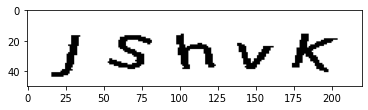

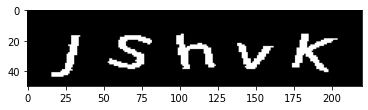

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Jhvk


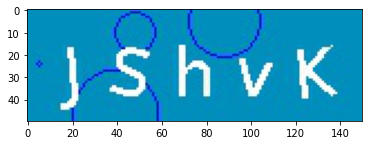

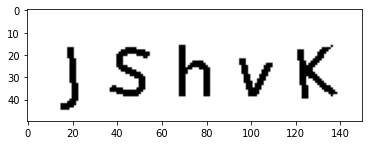

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


JShvK
Text detected completely
Accuracy :0.0%
Accuracy new:100.0%


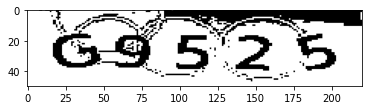

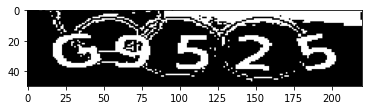

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


525


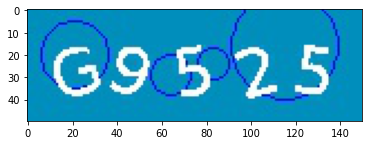

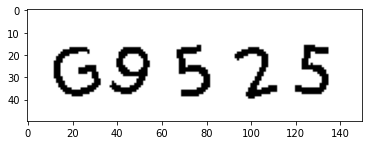

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


69525
Accuracy :0.0%
Accuracy new:50.0%


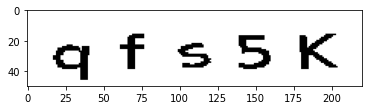

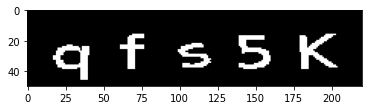

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


9f5K


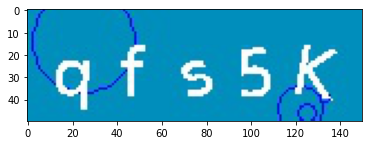

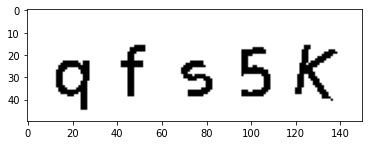

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


qf5K
Accuracy :0.0%
Accuracy new:33.333333333333336%


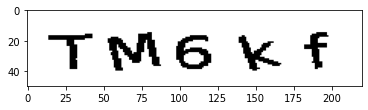

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-6dfe553a903e>", line 70, in <module>
    s = read_cap('newlogo.png')
  File "<ipython-input-4-6dfe553a903e>", line 32, in read_cap
    plt.show()
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py", line 353, in show
    return _backend_mod.show(*args, **kwargs)
  File "/home/srijithreddy/.local/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py", line 39, in show
    display(
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/display.py", line 313, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
  File "<decorator-gen-9>", line 2, in __call__
  File "/usr/local/lib/python3.8/dis

TypeError: object of type 'NoneType' has no len()

In [4]:
import matplotlib.pyplot as plt
import cv2
import pytesseract
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import progressbar
import easyocr
import time
from time import sleep
bar = progressbar.ProgressBar(maxval=500, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
start_time = time.time()
def change_image(Path):
    im = Image.open(Path) 
    imgplot = plt.imshow(im)
    plt.show()# Can be many different formats.
    im = im.convert('RGB')
    pix = im.load()
    his = im.histogram()
    pix_size = im.size
    im2 = Image.new(mode = "RGB", size = (pix_size),color = (255,255,255))
    nep = []
    for x in range(pix_size[0]):
        for y in range(pix_size[1]):
            if np.mean(pix[x,y]) > 150:
                im2.putpixel((x, y),(0, 0, 0)) 
    im2.save("newlogo.png")
def read_cap(Path):
    img = mpimg.imread(Path)
    imgplot = plt.imshow(img)
    plt.show()
    reader = easyocr.Reader(['en']) # need to run only once to load model into memory
    result = reader.readtext(Path ,detail = 0)
    values = ','.join(str(v) for v in result)
    result=values.replace(" ", "")
    result=result.replace(",", "")
    result=result.replace("O", "")
    text = result
    C=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
    for j in text:
        if str(j) not in (C):
            text = text.replace(j, "")
    print(text) 
    return(text)
def read_cap2(Path):
    im = Image.open(Path)
    im.show()
    image = cv2.imread(Path)
    
    img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    tessdata_config = r'--psm 7'
    text = pytesseract.image_to_string(img, config=tessdata_config)
    C=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
    for j in text:
        if str(j) not in (C):
            text = text.replace(j, "")
    #print(text)
    return(text)
B=['JShvK', 'G9525', 'qfs5K', 'TM6kf', 'F8mcU', 'sbs2J', 'v4sjR', 'GHxSu', 'jWEC5', '6SM7m', 'dsrmA', 'C8PGW', 'GUjPb', 'n5StK', 'MtWdE', '4ut6x', 'Bh3kV', 'RqeYw', 'nU4Fb', 'MUthU', '3yuUF', 'qDYjP', 'sDabT', '2fBQq', 'EYKGM', '47xwS', 'LDJ4w', 'Qfcwf', 'FsdM8', 'PqpCj', 'xERYH', 'nk8vb', '8PQab', 'CmDux', 'wd8dJ', 'REHLk', 'XkqkM', 'KQcDt', '8Ub43', 'upPEb', 'V4m8J', 'q2Ejy', 'WHWcU', 'jFTct', 'qFkYR', 'JkQ23', '8UjTp', 'VkCaE', 'bYU6u', 'a7xGL', 'FMKtC', 'MdeWL', 'x4a5P', 'XmQRX', '2WtbC', 'wT48W', 'QDUjj', 'feQLT', '7RPM7', 'D77yB', 'Lb7PV', 'Lcjy2', '7mymH', 'hwQTn', 'UEWLP', '7DhHS', 'VBPcB', 'csytY', '4Tdsr', '3DjxT', 'AWKsh', 'ywPLD', 'XwGTR', 'fcjf8', 'LXvah', 'qhSMh', '8t5Xb', 'FDeWK', 'Eahu8', 'CUvJ8', 'UnWBn', 'jnD3Y', 'aH35t', 'DQaKE', 'TmysD', 'EHRD7', 'KL4VT', 'FqXVy', 'Y7H48', 'aLmY6', 'Hy9Qy', 'M82SF', 'jMk7s', '43fpu', 'Hu5UX', 'Ej84e', 'BvRDw', 'jaQmX', 'jMQUH', 'fU3UX','RY3u6', '9wE7E', 'vdb4d', 'rbuPe', 'GWmJw', 'SA4mb', '7auRH', 'DnfXY', 'uVaWY', 'npcMK', 'jcDKc', '5P4V8', 'u7anm', 'eRT8x', 'VkeMW', 'TL36v', 'yqQJa', 'DkpvG', 'kRMYM', 'cDEJe', '5m8dL', 'LpeC6', 'UDKXb', 'mUyVH', 'MhRfG', 'j6juG', 'b3GYF', 'VjKrx', 'dBnSj', 'v6DY2', '36YeS', 'DGe5n', 'UBxnD', 'J9Qx3', 'ewpdE', 'Wc45H', 'LDdWJ', 'PVfme', 'MnxBP', 'sxmXW', 'deLx6', 'UqUmG', 'pqBPQ', 'CpcBX', 'WKuVB', 'RyRhQ', 'a84d2', 'umseQ', 'UWcyT', 'WhxD6', 'nf5P9', 'psrRh', 'trKD7', 'TkFDR', 'sf5B5', 'npEMH', 'kHMLS', '7dd3k', 'Sj98k', 'stRMk', 'H26Hr', 'fqVPn', 'vbbE7', 'JV6Gv', '2X2xs', '6brtL', 'xw6Fd', 'v2SyY', '8cdE5', 'jtKqK', 'qjHTF', 'bLxjn', 'w5krb', 'pyRed', '7Seju', 'ku5jG', 'hwhKw', 'nQPEa', '4Lh4V', 'fCCtB', '4u47C', 'Qr7eh', 'cppX7', 'nKaVS', 'uT3jt', 'B5tke', '2k6QJ', 'RWmGF', 'qDJnU', 'Lbn8j', 'cSEFj', 'DTcQG', 'U7nDG', 'HeBvn', 'K82R2', 'a7Vxk', '7xKpB', 'PGw5U', '8BFC2', 'FsbA8', '758ub', 'auK6F', 'UVXyE', 'aK4pk', 'xnsma', 'q5fK7', 'SqvXp', 'CDvYn', 'VEST6', 'KvvA5', 'mabmQ', 'n3RnK', 'LbJFC', 'jbsDa', 'aJQPd', 'XY3SR', 'Ar5DT', 'fwwUT', 'eJvHG', '4hVxH', 'C6fTk', 'GhfyB', 'f5FpU', 'kka5F', '8kDWF', 'hrK3A', '8WqjK', 'YUUQu', 'HMxmH', 'nukWk', 's55H5', 'kRhKj', 'CJVvS', 'TaQrC', 'aQvTF', 'WsP5s', 'stnyh', 'dVXXP', 'RQStM', 'rPmSh', 'WeVJn', 'kkLFA', 'qEjqc', 'FtPK4', 'Ca6FD', 'dyCV3', 'fMcrS', 'vXV8Q', 'bAeB9', 'kb548', 'LanQR', 'KJD8U', 'jmfax', 'AnYH8', 'aeRGC', '69UQf', 'fkv6W', 'xCuLG', 'Ku2t9', 'qsh5c', 'BdcVx', 'X8BVh', 'RrGUp', '2ypyT', 'PLjwL', 'BsRwm', 'E6ktE', 'Ynrx3', 'uSe5s', 'LhyyJ', 'BMV8c', 'P4tBE', '2PQGD', 'muPJS', 'GepdX', 'n87Su', 'TwTBV', 'DM5EV', 'SUehs', 'GJ9Pm', 'SRqU5', 'sXV6D', 'f6dUp', 'naVan', 'AGn2t', 'D5XJ7', 'Pf8Vw', '3xDcV', 'f5TBn', 'CCyCG', 'GfYkL', 'Y8XMc', 'Q3ERK', 'GFvDv', 'qB9k2', 'mK7ES', '5VmCu', 'VL77s', 'j8vvQ', 'qHMb7','F3mMj', 'KSA53', 'qve6M', '5FuUy', '8sLcR', 'rXs2f', 'jG4bT', 'FvUKq', 'bxb5a', 'ycVGv', '4EJX2', 'sPrjV', 'DMGm7', 'enrSL', 'DCFwr', 'VmraB', 'vtWL5', 'ECQRa', 'uHfHD', 'CMqQT', 'X3wHE', 'k8bjA', 'wHuGw', 'yYXde', 'uVr7J', 'SjnMk', 'tBbQ5', 'HTCyX', 'HUnSK', 'aTXFu', 'JSRpT', 'kM7Fd', 'QGeMM', 'wEjDS', 'y8xnf', '9kYTa', 'vxtMx', 'WDkup', 'W6cWM', 'Kyp5T', 'Sp3hy', 'L2cL4', 'wh9uf', 'furY7', 'H5U6c', 'h3qQh', 'fdRyW', 'p5Asu', '4uGVG', 'CMGUd', 'pBJuv', 'FmKyC', 'WkWa3', 'MKku3', 'uwuf5', 'ypLFp', 'qe7eq', 'uyfsH', 'xnSFy', 'QHwss', 'ESSpm', 'q7K8r', 'UdvP4', 'jfSEX', 'QKXRU', 'KqVMP', 'YkYWc', 'sHXn4', 'R4VFX', 'cVKB5', 'hbmuD', 'QwALS', 'EruXw', 'apvWW', 'FapjX', 'dkPfL', '8nvxj', 'X8uAP', 'pyCXd', 'PEaMS', 'jJn67', 'cfkvL', 'x54BG', 'AnbSx', 'TjGEa', 'UwBqV', 'vXDKb', 'ddKWw', 'uW8TW', 'u4MaQ', 'JWLC5', 'ceyy4', 'CVHfd', 't3fLV', 'w6few', 'q9cX5', 'pKJ7V', 'm4QDT', 's4uR2', 'QwVMB', 'Ktrfa', 'nEEA9', '4kvsY', 'y3rML', 'vCfHd', 'DWd3B', 'kb9bE', 'DCaMj', 'wHh3P', 'HSHqG', 'fuUJL', 'Xa7eu', 'FVC8m', 'MJW57', 'wQ52t', '5wUhp', 'jexHX', 'WXcnJ', 'Vx5uB', 'yVDw5', 'FqCh4', '8KnxF', 'wCv84', 'rpVpf', 'MGmrn', 'Tqq6D', 'YU7JY', 'k3hxP', '64PU4', 'wFsXx', 'GBxjJ', '5Bp5J', 'FaEYS', 'hYeUn', 'Sy45U', 'R4x7C', 'u3dhF', '2JsKj', 'pLTH2', 'jhU5C', '8rJwQ', 'Dnfvn', 'QWR8U', 'XYUCa', 'vLGUW', 'Re8UX', 'nERT2', 'bRYcQ', 'SMXe3', 'mbMCv', 'En4W2', 'Umv4a', 'vHy3T', 'qHwwe', '8HpuQ', 'PEtKT', 'LyL4t', 'LrutS', 'JuL6r', 'd2nuV', 'YymLM', 's4fBv', 'BBhYK', '7Lu4W', 'c77MQ', 'ECWaK', 'vKPkG', 'hUsPU', 'Dqntu', 'dUkMe', '52Gxk', 'fmwcS', 'JGQva', 'KtD5F', 'qdnxU', 've8fQ', 'r6PkV', 'aRDv3', '7YeWp', 'rnC52', 'EDJcS', 'eGUJP', 'hDSQq', 'U9rSa', 'xeaBB', 'tCWm2', 'vLfGE', 'QemSF', 'CUHxU', 'FuVhX', 'q6qBr', 'b2KwQ', 'ahKE5', 'AxM2p', 'Spxt3', 'wfwuc', 'QRMeG', 'tLbVy', 'jEGaF', '9LK5R']

count=0
l=500
count2=0
Accuracy = np.zeros(l)
Accuracy2 = np.zeros(l)
bar.start()
for i in range(l):
    change_image('capt'+str(i)+'.png')
    s = read_cap('newlogo.png')
    bar.update(i+1)
    if len(s)==5:       
        if str(s) == B[i]:
            count = count +1
            print("Text detected completely")
    change_image('capa'+str(i)+'.png')
    s = read_cap('newlogo.png')
    if len(s)==5:
        if str(s) == B[i]:
            count2 = count2 +1
            print("Text detected completely")
    Accuracy[i] = 100*count/(i+1)
    Accuracy2[i] = 100*count2/(i+1)
    print("Accuracy :"+ str(100*count/(i+1))+"%")
    print("Accuracy new:"+ str(100*count2/(i+1))+"%")
bar.finish()
print("--- %s seconds ---" % (time.time() - start_time))
print("Accuracy :"+ str(100*count/l)+"%")
print("Accuracy new:"+ str(100*count2/l)+"%")
figure1=plt.figure(1,figsize=(12,10))
plt.plot(np.linspace(1,l,num=l),Accuracy,'r-o',markersize=3)
plt.plot(np.linspace(1,l,num=l),Accuracy2,'b-o',markersize=3)
plt.legend(["Accuracy", "Accuracy new"])
plt.title('Accuracy ')
plt.xlabel('no of samples')
plt.ylabel('Accuracy')
plt.show()

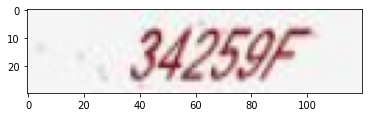

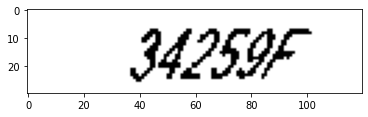

In [1]:
import matplotlib.pyplot as plt
import cv2
import pytesseract
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
def change_image(Path):
    im = Image.open(Path) # Can be many different formats.
    im = im.convert('RGB')
    pix = im.load()
    his = im.histogram()
    #print(his)
    pix_size = im.size
    im2 = Image.new(mode = "RGB", size = (pix_size),color = (255,255,255))
    nep = []
    for x in range(pix_size[0]):
        for y in range(pix_size[1]):
            if np.mean(pix[x,y]) > 160:
                im2.putpixel((x, y),(0, 0, 0)) 
    im2.save("newlogo.png")
# intializing the list
# initializing dict to store frequency of each element
im = Image.open("Logo5.png") 
imgplot = plt.imshow(im)
plt.show()
change_image("Logo5.png")
change_image("newlogo.png")
im = Image.open("newlogo.png") 
imgplot = plt.imshow(im)
plt.show()
#blue (0,145,187,255)
        # Get the width and hight of the image for iterating over# Get the RGBA Value of the a pixel of an image
# Set the RGBA Value of the image (tuple)
  # Save the modified pixels as .png